In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

In [2]:
data = pd.read_csv('train.csv', index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


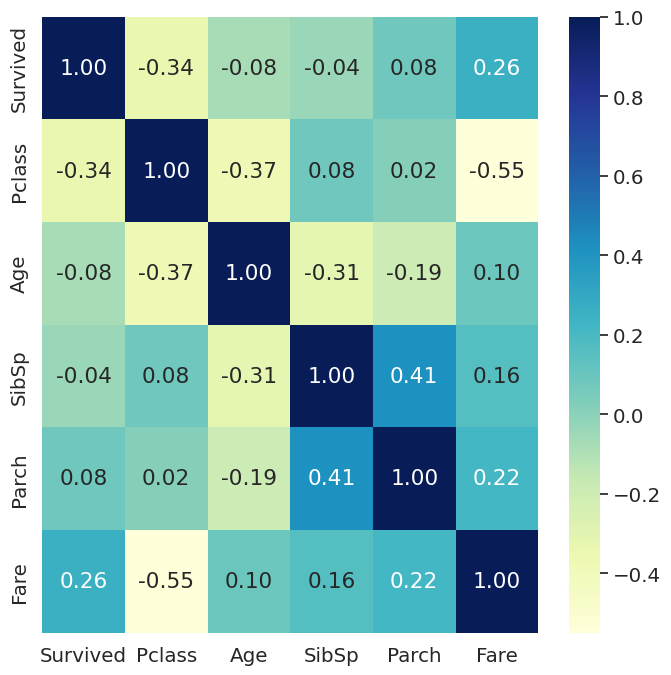

In [3]:
plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(numeric_only=True), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

Заметно, что явных зависимостей выживаемости от какого-то из параметров нет, однако стоит оратить внимание на связь с классом пассажира, Fare и небольшую связь с возрастом. Хорошо выражается связь класса и Fare, а также Parch и SibSp, которые отображают схожие параметры

Исследуем выживжих по возрастам. Сначала посмотрим на данные без разделения по полу

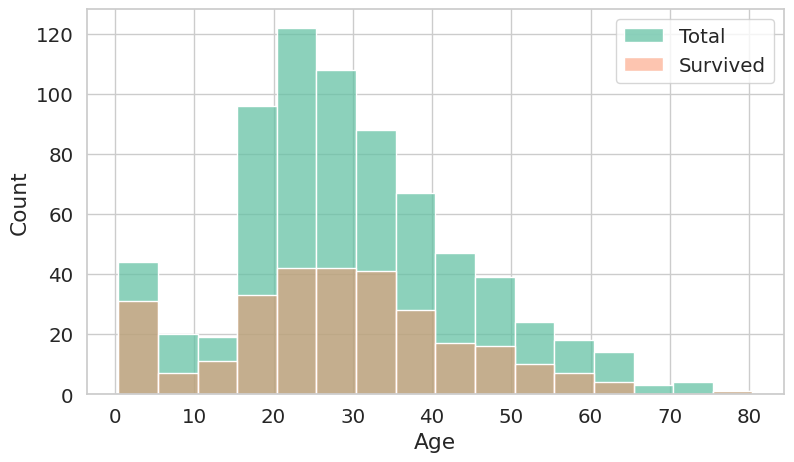

In [4]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=data, x='Age', binwidth = 5, label='Total')
    sns.histplot(data=data[data['Survived'] == 1], x='Age', binwidth = 5, alpha = 0.5, label='Survived')
    
    plt.legend()

Явных зависимостей не видно, заметно лишь то, что процент выживших детей заметно больше, чем взрослых. Попробуем разбить данные ещё и по половому признаку 

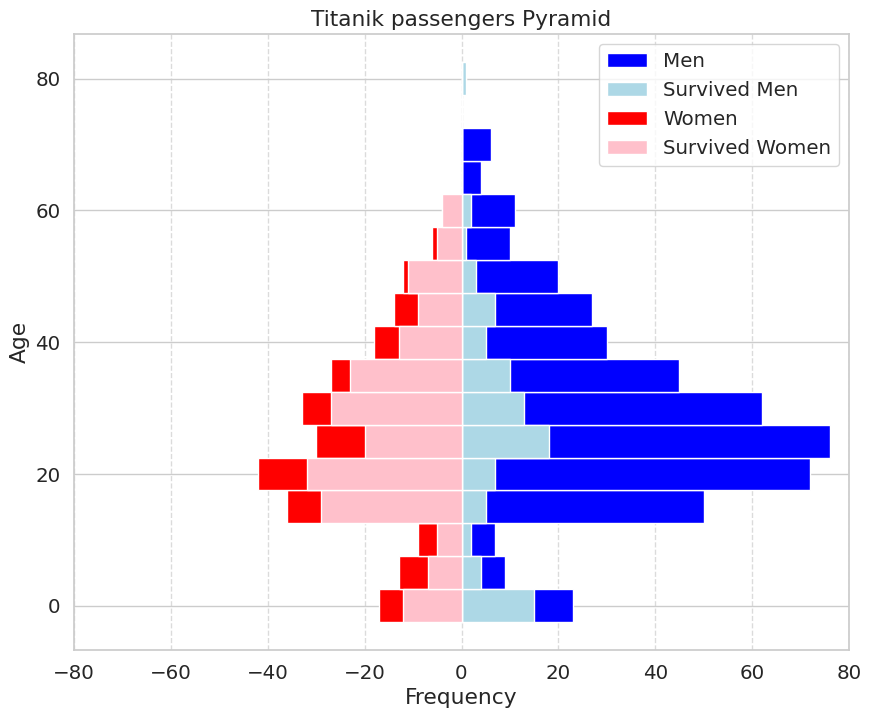

In [5]:
# Разделим данные по полу
men_data = data[data['Sex'] == 'male']
women_data = data[data['Sex'] == 'female']

# Так же разделим данные выживших по полу
survived_data = data[data['Survived'] == True]
men_survived_data = survived_data[survived_data['Sex'] == 'male']
women_survived_data = survived_data[survived_data['Sex'] == 'female']

# Разделяем данные по ящикам
age_bins = np.arange(0, data['Age'].max() + 10, 5)
men_freq, _ = np.histogram(men_data['Age'], bins=age_bins)
women_freq, _ = np.histogram(women_data['Age'], bins=age_bins)
survived_age_bins = np.arange(0, data['Age'].max() + 10, 5)
men_survived_freq, _ = np.histogram(men_survived_data['Age'], bins=survived_age_bins)
women_survived_freq, _ = np.histogram(women_survived_data['Age'], bins=survived_age_bins)

fig, ax = plt.subplots(figsize=(10, 8))

# Вертим оси, чтобы было красиво
ax.barh(age_bins[:-1], men_freq, height=5, color='blue', align='center', label='Men')
ax.barh(survived_age_bins[:-1], men_survived_freq, height=5, color='lightblue', align='center', label='Survived Men')
ax.barh(age_bins[:-1], -women_freq, height=5, color='red', align='center', label='Women')
ax.barh(survived_age_bins[:-1], -women_survived_freq, height=5, color='pink', align='center', label='Survived Women')
ax.set(ylabel='Age', xlabel='Frequency', title='Titanik passengers Pyramid')
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.legend(loc='upper right')

plt.xlim(-80, 80)

plt.show()

Вот это да! Вот это анализ данных. Это очень информативный график, по нему сразу понятно, что происходило на борту. Видно, что мужчин среди пассажиров значительно больше, но выжило их меньше, чем женщин. Единственная категория мужчин, выживаемость которых не уступает женщинам - мальчики до 10 лет

Теперь проанализируем состав пассажиров по классам. Посмотрим на общее соотношение по полу, а также на сотноошения по каждому классу в отдельности. Справа расположим аналогичные графики, но только среди выживших людей

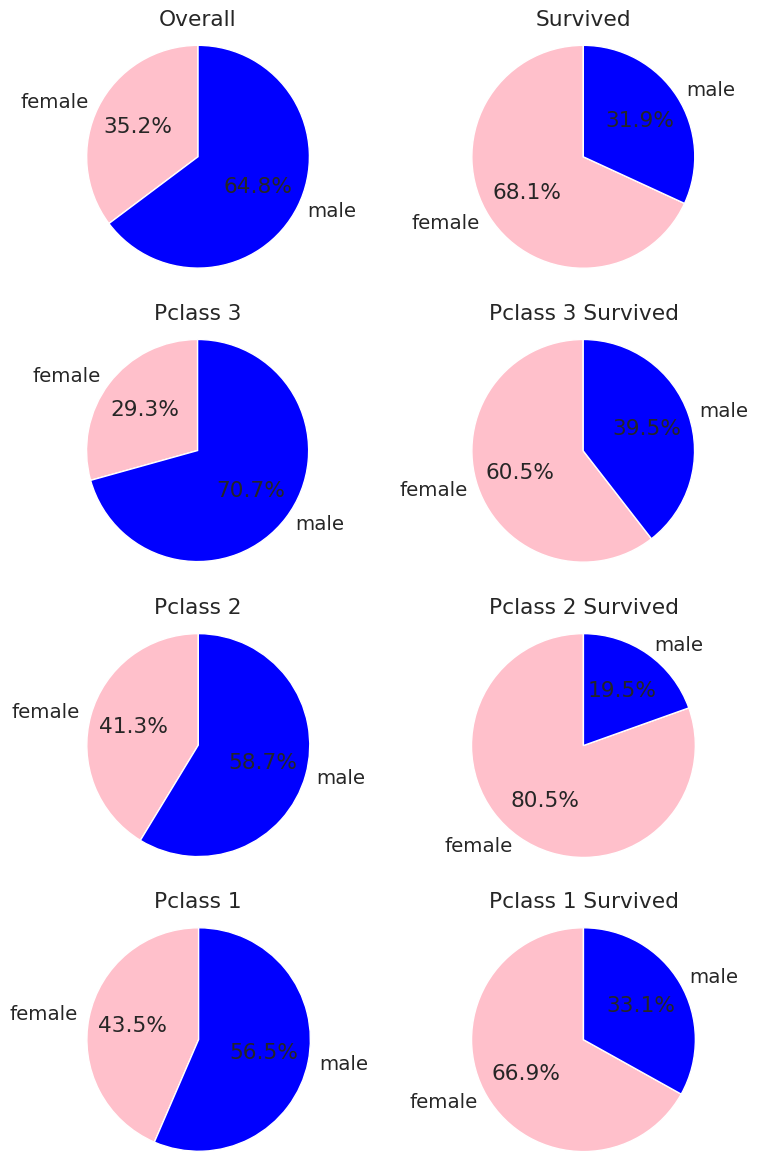

In [6]:
colors = {'male': 'blue', 'female': 'pink'}
counts = data.groupby(['Sex', 'Pclass']).size().reset_index(name='Count')

survived = data[data['Survived'] == 1]
survived_counts = survived.groupby(['Sex', 'Pclass']).size().reset_index(name='Count')

# Разметка на подграфики
fig, axes = plt.subplots(4, 2, figsize=(8, 12))

overall_counts = data['Sex'].value_counts()
overall_counts = overall_counts.reindex(index=['female', 'male'])
axes[0, 0].set_title('Overall')
axes[0, 0].pie(overall_counts, labels=overall_counts.index, autopct='%1.1f%%', startangle=90, colors=[colors[x] for x in overall_counts.index])
axes[0, 0].axis('equal')

# Все выжившие
survived_overall_counts = survived['Sex'].value_counts()
survived_overall_counts = survived_overall_counts.reindex(index=['female', 'male'])
axes[0, 1].set_title('Survived')
axes[0, 1].pie(survived_overall_counts, labels=survived_overall_counts.index, autopct='%1.1f%%', startangle=90, colors=[colors[x] for x in survived_overall_counts.index])
axes[0, 1].axis('equal')

# Отдельно каждый класс
for idx, pclass in enumerate(sorted(data['Pclass'].unique(), reverse=True)):
    ax1 = axes[idx + 1, 0]
    ax2 = axes[idx + 1, 1]
    ax1.set_title(f'Pclass {pclass}')
    ax2.set_title(f'Pclass {pclass} Survived')
    
    counts_pclass = counts[counts['Pclass'] == pclass]
    survived_counts_pclass = survived_counts[survived_counts['Pclass'] == pclass]
    
    ax1.pie(counts_pclass['Count'], labels=counts_pclass['Sex'], autopct='%1.1f%%', startangle=90, colors=[colors[x] for x in counts_pclass['Sex']])
    ax1.axis('equal')
    
    ax2.pie(survived_counts_pclass['Count'], labels=survived_counts_pclass['Sex'], autopct='%1.1f%%', startangle=90, colors=[colors[x] for x in survived_counts_pclass['Sex']])
    ax2.axis('equal')

plt.tight_layout()
plt.show()

Здесь мы видим, что вне зависимости от класса, хоть мужчин изначально было больше, выжило среди намного меньше, чем среди женщин. Теперь хотелось бы исследовать, зависит ли выживаемость пассажиров от класса. Построим столбчатую диаграмму, в которой отобразим, какая часть пассажиров каждого кдасса выжила

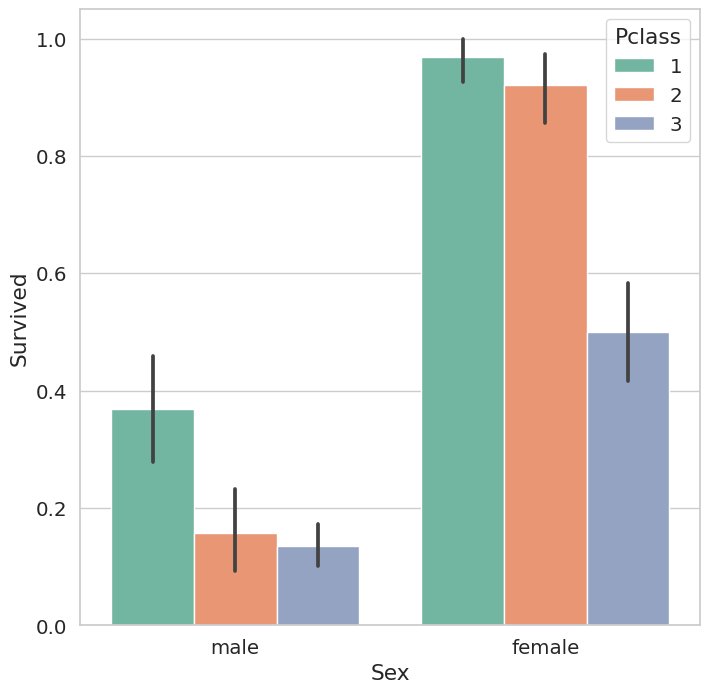

In [7]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=data)
plt.show()

Заметим, что подавляющее большинство женщин из первого и второго класса выжило, а из третьего - всего половина. Мужчины из первого класса выживали значительно более часто, чем из второго и третьего, откуда выжило меньше 20% пассажиров мужского пола.

Теперь исследуем данные на зависимость от 'Fare'. Сначала посмотрим на распределение пассажиров по Fare

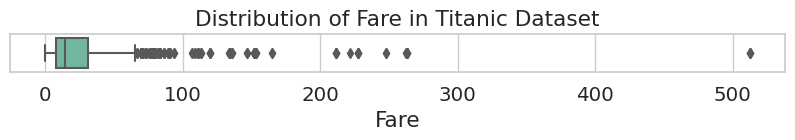

In [8]:
plt.figure(figsize=(10, 0.5))
sns.boxplot(x='Fare', data=data)
plt.title('Distribution of Fare in Titanic Dataset')
plt.xlabel('Fare')
plt.show()

Видно, что пассажиры очень плотно сгруппированы около медианы

Теперь исследуем выживаемость в зависимости от группы по Fare

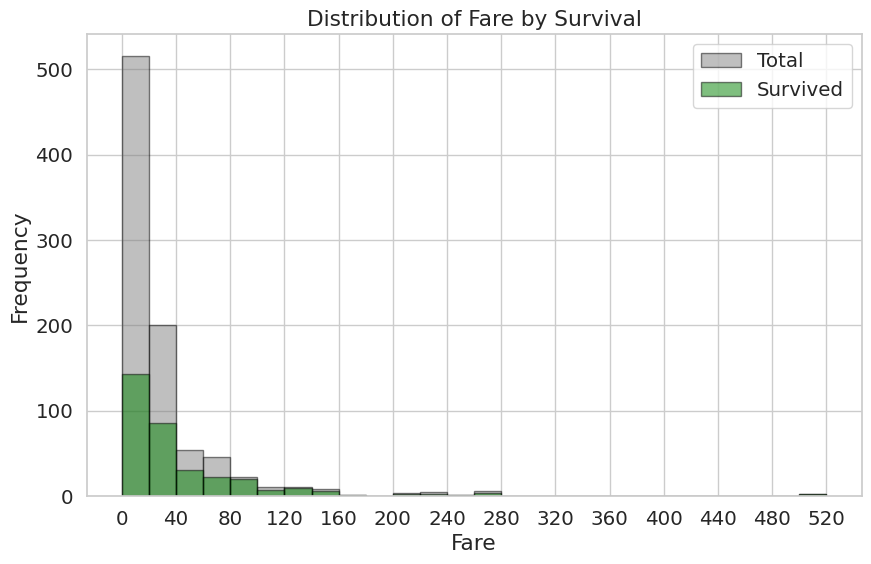

In [9]:
# Интервалы
fare_intervals = range(0, int(data['Fare'].max()) + 20, 20)

# Все пассажиры
plt.figure(figsize=(10, 6))
plt.hist(data['Fare'], bins=fare_intervals, edgecolor='black', color='grey', alpha=0.5, label='Total')

# Выжившие
plt.hist(data[data['Survived'] == 1]['Fare'], bins=fare_intervals, edgecolor='black', color='green', alpha=0.5, label='Survived')

plt.title('Distribution of Fare by Survival')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.xticks(fare_intervals[::2])
plt.grid(True)
plt.legend()
plt.show()


Слегка проглядывается увеличение процента выживших при увеличении Fare. Попробуем построить график зависимости, учитывающий размер каждой группы пассажиров по Fare. Отбросим несколько записей, Fare которых > 300


In [10]:
data_fare_slice = data[data['Fare']<300]

print('Отбросили ', np.around((1 - len(data_fare_slice)/len(data))*100,decimals=2), '% записей', sep='')

Отбросили 0.34% записей


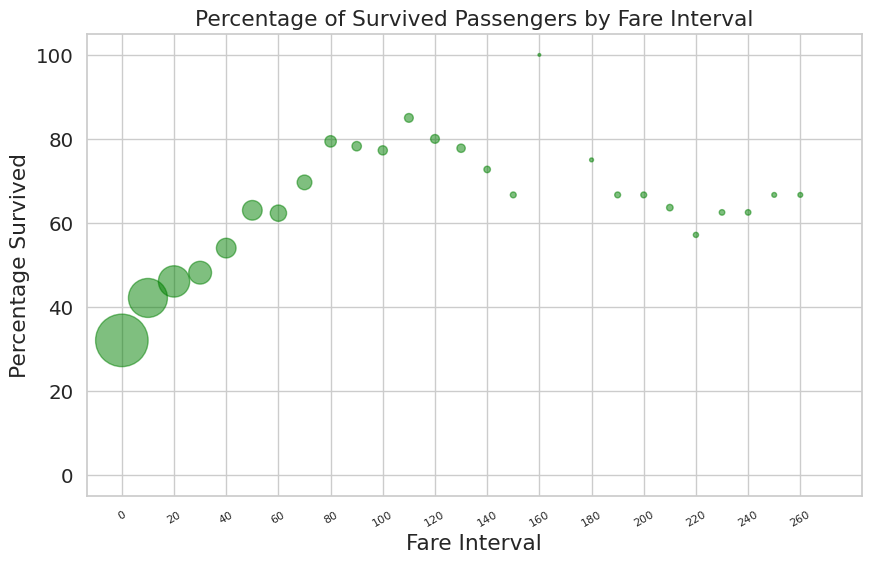

In [11]:
fare_intervals = range(0, int(data_fare_slice['Fare'].max()) + 10, 10)

# Вычисления
survived_percentages = []
total_passengers_in_interval = []
for interval in fare_intervals:
    total_in_interval = len(data_fare_slice[(data_fare_slice['Fare'] >= interval) & (data_fare_slice['Fare'] < interval + 40)])
    survived_in_interval = len(data_fare_slice[(data_fare_slice['Fare'] >= interval) & (data_fare_slice['Fare'] < interval + 40) & (data_fare_slice['Survived'] == 1)])
    if total_in_interval > 0:
        percentage_survived = survived_in_interval / total_in_interval * 100
        survived_percentages.append(percentage_survived)
        total_passengers_in_interval.append(total_in_interval)
    else:
        survived_percentages.append(0)
        total_passengers_in_interval.append(0)

# Разметка графика
plt.figure(figsize=(10, 6))
plt.scatter(fare_intervals, survived_percentages, s=np.array(total_passengers_in_interval)*2, color='green', alpha=0.5, edgecolors='green')
plt.title('Percentage of Survived Passengers by Fare Interval')
plt.xlabel('Fare Interval')
plt.ylabel('Percentage Survived')
plt.grid(True)
plt.xticks(fare_intervals[::2], fontsize=8, rotation=30)
plt.show()


Поразительно выраженная зависимость. Явно проглядывается зависимость процента выживаемости от платы для больших групп пассажиров, исходя из этого Fare может быть одним из параметров для обучения KNN